<table style="width: 100%;" id="nb-header>">
        <tr style="background-color: transparent;"><td>
            <img src="https://ds-connectors.github.io/econ-fa19/assets/images/blue_text.png" width="250px" style="margin-left: 0;" />
        </td><td>
            <p style="text-align: right; font-size: 10pt;"><strong>Economic Models</strong>, Spring 2020<br>
                Dr. Eric Van Dusen<br>
            Notebook by Andrei Caprau<br>
            </p></td></tr>
    </table>

# Lecture 10: Econometrics

## What is Econometrics?

The closest economists can usually get to doing experiments in the same way experiments are done in medicine and other fields involving people.

By randomly assigning a large sample of participants to two different groups, we can be fairly confident that on average the two groups are identical in their attributes, apart from the treatment that only one group receives.

We can look at the difference in outcomes of the two groups and be fairly confident that any differences are due to the treatment and nothing else.

Usually impossible or unethical to perform an ideal experiment in economics.

Can you force people into a treatment group with more years of schooling and a control group with less?

Is it sufficient to just collect a sample of people and compare the earnings of people with high schooling to those with low schooling?

How can we answer the above question and others like it? Econometrics.

Econometrics is a vast field and today we will just focus on the basics of regression.

## Data 8 Review of Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
warnings.simplefilter("ignore")
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import patches
from datascience import *
%matplotlib inline
from sklearn.metrics import mean_squared_error
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

In [2]:
# Hide this.
np.random.seed(42)
x = np.random.uniform(0, 10, 100)
noise = np.random.randn(100) * 4
y = 1.5 * x + noise

![title](figure1.png)

$x$ and $y$ above have some **correlation coefficient** $r$, which is a measure of the strength of the linear relationship between the two variables.

In [3]:
def standard_units(array):
    return (array - np.mean(array)) / np.std(array)

x_standard = standard_units(x)
y_standard = standard_units(y)

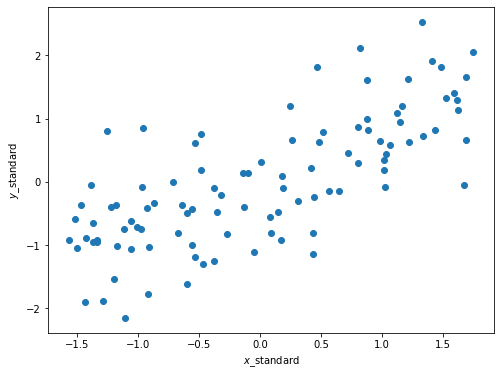

In [4]:
plt.figure(figsize=(8,6))
plt.scatter(x_standard, y_standard)
plt.xlabel('$x$_standard')
plt.ylabel('$y$_standard');

Recall that $r$ is calculated as the average of the product of two variables, when the variables are measured in standard units.

In [5]:
def correlation(array1, array2):
    return np.mean(array1 * array2)

correlation(x_standard, y_standard)

0.7351364076052979

Recall from Data 8 that we use $r$ to form a line called the *regression line*, which makes predictions for $y$ given some $x$.

Our prediction for $y$ in standard units is $r \cdot x$.

If we want to fit this regression line in the original units, recall that the slope of this line is given by

$$
\text{slope} = r \cdot \dfrac{\hat{\sigma}_y}{\hat{\sigma}_x}
$$

and the intercept is given by

$$
\text{intercept} = \hat{\mu}_y - \text{slope} \cdot \hat{\mu}_x
$$

Slope:  1.3160907091507876


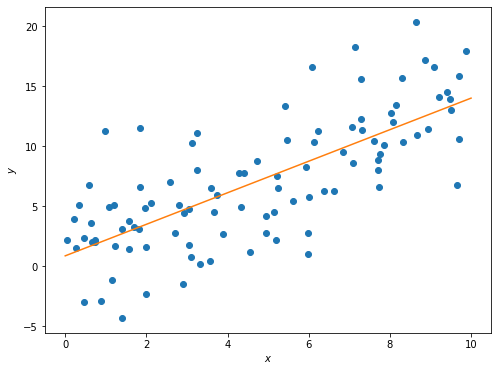

In [6]:
r = correlation(x_standard, y_standard)
slope = r * np.std(y) / np.std(x)
intercept = np.mean(y) - slope * np.mean(x)
plt.figure(figsize=(8,6))
plt.scatter(x, y)
plt.plot(np.linspace(0, 10), slope * np.linspace(0, 10) + intercept, color='tab:orange')
plt.xlabel('$x$')
plt.ylabel('$y$');
print('Slope: ', slope)

In [7]:
np.random.seed(42)
x = np.random.uniform(0, 10, 100)
noise = np.random.randn(100) * 4
y = 1.5 * x + noise

$$
y = 1.5 \cdot x + u
$$

where $u$ is some random noise whose average is 0.

The least-squares slope we generate from the data is an *estimate* of the "true" slope of that data.

The estimated slope is a random variable that depends on the data we happen to have.

In [8]:
np.random.seed(189)
x = np.random.uniform(0, 10, 100)
noise = np.random.randn(100) * 4
y = 1.5 * x + noise

Slope:  1.5590151265266388


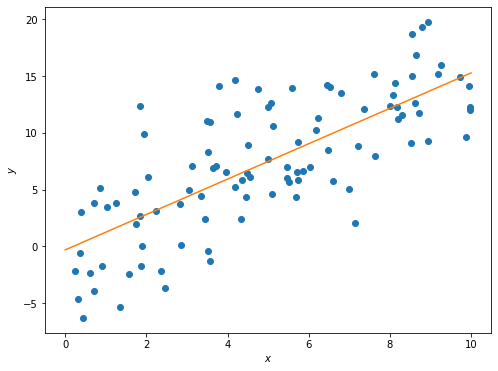

In [9]:
r = correlation(x_standard, y_standard)
slope = r * np.std(y) / np.std(x)
intercept = np.mean(y) - slope * np.mean(x)
plt.figure(figsize=(8,6))
plt.scatter(x, y)
plt.plot(np.linspace(0, 10), slope * np.linspace(0, 10) + intercept, color='tab:orange')
plt.xlabel('$x$')
plt.ylabel('$y$');
print('Slope: ', slope)

Correlation in data *does not* imply causation.

### RMSE

In [10]:
d = Table().with_columns(
    'x', make_array(0,  1,  2,  3,  4),
    'y', make_array(1, .5, -1,  2, -3))

def rmse(target, pred):
    return np.sqrt(mean_squared_error(target, pred))

def plot_line_and_errors(slope, intercept):
    print("RMSE:", rmse(slope * d.column('x') + intercept, d.column('y')))
    plt.figure(figsize=(5,5))
    points = make_array(-2, 7)
    p = plt.plot(points, slope*points + intercept, color='orange', label='Proposed line')
    ax = p[0].axes
    
    predicted_ys = slope*d.column('x') + intercept
    diffs = predicted_ys - d.column('y')
    for i in np.arange(d.num_rows):
        x = d.column('x').item(i)
        y = d.column('y').item(i)
        diff = diffs.item(i)
        
        if diff > 0:
            bottom_left_x = x
            bottom_left_y = y
        else:
            bottom_left_x = x + diff
            bottom_left_y = y + diff
        
        ax.add_patch(patches.Rectangle(make_array(bottom_left_x, bottom_left_y), abs(diff), abs(diff), color='red', alpha=.3, label=('Squared error' if i == 0 else None)))
        plt.plot(make_array(x, x), make_array(y, y + diff), color='red', alpha=.6, label=('Error' if i == 0 else None))
    
    plt.scatter(d.column('x'), d.column('y'), color='blue', label='Points')
    
    plt.xlim(-4, 8)
    plt.ylim(-6, 6)
    plt.gca().set_aspect('equal', adjustable='box')
    
    plt.legend(bbox_to_anchor=(1.8, .8))
    plt.show()

In [11]:
interact(plot_line_and_errors, slope=widgets.FloatSlider(min=-4, max=4, step=.25), intercept=widgets.FloatSlider(min=-4, max=4, step=.25));

interactive(children=(FloatSlider(value=0.0, description='slope', max=4.0, min=-4.0, step=0.25), FloatSlider(v…

## Now Back to Economics

With (well-behaved) data, we can fit a least-squares line.

* Of particular interest to data scientists is the line's ability to predict values of $y$ for new values of $x$ that we didn't see before.
* Of particular interest to economists is the line's ability to estimate the "true" underlying slope of the data.

Use the slope of the regression line to estimate the "true" relation between the variables in question and learn more about the world we live in.

In econometrics, we usually write the "true" underlying linear relationship as:

$$
y = \alpha + \beta \cdot x + \varepsilon
$$

where $y$ and $x$ are values for any arbitrary point, $\alpha$ is the intercept, $\beta$ is the slope, and $\varepsilon$ is some noise.

```python
y = 1.5 * x + noise
```

Here, $\beta = 1.5$, $\alpha = 0$, and $\varepsilon = \text{noise}$.

When fitting a regression line onto data, we express the line as:

$$
\hat{y} = \hat{\alpha} + \hat{\beta} \cdot x
$$

Hats are *estimates*.

## Example: Years of Schooling and Earnings

In [12]:
cps = Table.read_table('cps.csv')
cps.sample(5)

state,age,wagesal,imm,hispanic,black,asian,educ,wage,logwage,female,fedwkr,statewkr,localwkr
52,36,3000,0,0,1,0,12,4,1.38629,1,0,0,0
55,41,37000,0,0,0,0,12,14.2308,2.65541,0,0,0,0
32,35,19000,0,0,0,0,16,36.5385,3.59837,1,0,0,0
33,43,250000,0,0,0,0,16,80.1282,4.38363,0,0,0,0
92,42,42000,1,0,0,0,18,20.1923,3.0053,0,0,0,1


### Brief Detour on Wage and Similar Variables

Wage tends to vary by a proportion rather than an absolute amount.

Consider how the variable GDP behaves.

In [13]:
GDPs = []
GDPs.append(100)

for _ in range(99):
    GDPs.append(GDPs[-1] * 1.05)

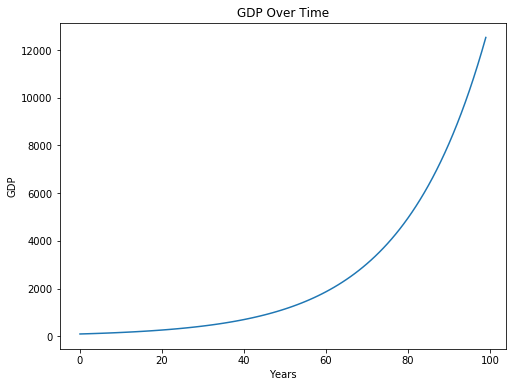

In [14]:
plt.figure(figsize=(8,6))
plt.plot(np.arange(100), GDPs)
plt.xlabel('Years')
plt.ylabel('GDP')
plt.title('GDP Over Time');

Impressive but misleading.

Exponential growth.

For variables that tend to vary by proportions rather than absolute amounts, we take the natural log.

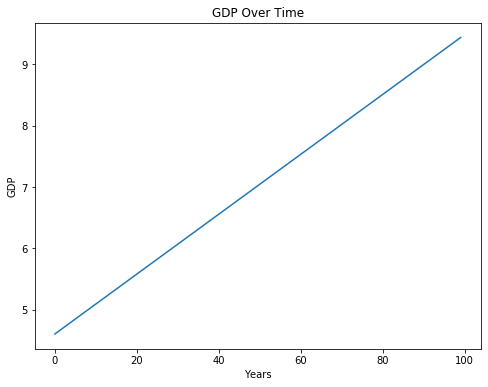

In [15]:
ln_GDPs = np.log(GDPs)
plt.figure(figsize=(8,6))
plt.plot(np.arange(100), ln_GDPs)
plt.xlabel('Years')
plt.ylabel('GDP')
plt.title('GDP Over Time');

You can interpret the slope as the approximate *percent change* in GDP for an increase in one year.

In [16]:
print('Slope between years 0 and 1: ', ln_GDPs[1] - ln_GDPs[0])

Slope between years 0 and 1:  0.04879016416943127


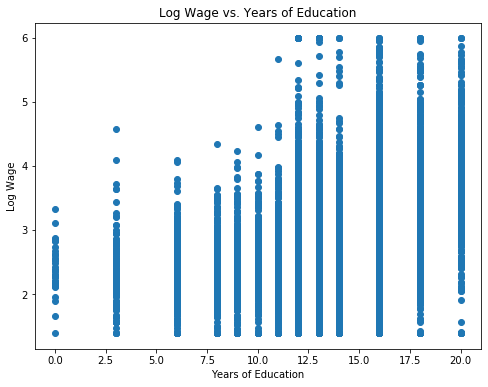

In [17]:
educ = cps.column('educ')
logwage = cps.column('logwage')
plt.figure(figsize=(8,6))
plt.scatter(educ, logwage)
plt.xlabel('Years of Education')
plt.ylabel('Log Wage')
plt.title('Log Wage vs. Years of Education');

In [18]:
educ_standard = standard_units(educ)
logwage_standard = standard_units(logwage)

r = correlation(logwage_standard, educ_standard)
slope = r * np.std(logwage) / np.std(educ)
intercept = np.mean(logwage) - slope * np.mean(educ)

Slope:  0.10781133924799272
Intercept:  1.472287673006932


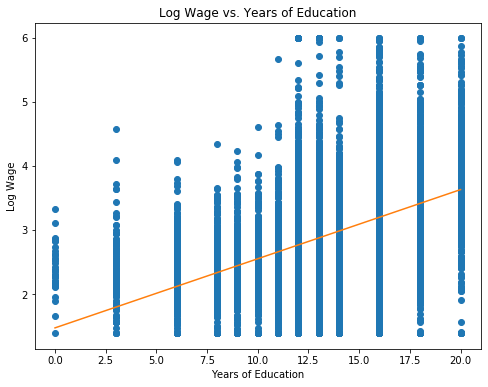

In [19]:
plt.figure(figsize=(8,6))
plt.scatter(educ, logwage)
plt.plot(np.linspace(0, 20), slope * np.linspace(0, 20) + intercept, color='tab:orange')
plt.xlabel('Years of Education')
plt.ylabel('Log Wage')
plt.title('Log Wage vs. Years of Education');
print('Slope: ', slope)
print('Intercept: ', intercept)

To do single variable regression in Python, we use the `statsmodels` package, which has a very simple flow:

```python
X = tbl.column(feature)
y = tbl.column(target)
model = sm.OLS(y, sm.add_constant(X))
result = model.fit()
result.summary()
```

Note: In order for `statsmodels` to give us an intercept term, we must add a column of all 1's to the data. 

This is typical in econometrics and you should essentially always have this constant column.

In [20]:
sm.add_constant(educ)

array([[ 1., 14.],
       [ 1., 14.],
       [ 1., 12.],
       ...,
       [ 1., 14.],
       [ 1., 18.],
       [ 1., 20.]])

In [21]:
model = sm.OLS(logwage, sm.add_constant(educ)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.204
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     5600.
Date:                Mon, 13 Apr 2020   Prob (F-statistic):               0.00
Time:                        13:45:41   Log-Likelihood:                -20513.
No. Observations:               21907   AIC:                         4.103e+04
Df Residuals:                   21905   BIC:                         4.105e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4723      0.021     71.483      0.000       1.432       1.513
x1             0.1078      0.001     74.831      0.000       0.105       0.111
==============================================================================
Omnibus:                      989.972   Durbin-Watson:                   1.873
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2802.765
Skew:                           0.201   Prob(JB):                         0.00
Kurtosis:                       4.706   Cond. No.                         70.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Uncertainty in $\hat{\beta}$

Slope from regression is an estimate of the "true" underlying slope.

The estimate $\hat{\beta}_1$ is a random variable that depends on the underlying data.

We assume there is some true linear relation,

$$
\text{logwage} = \alpha + \beta \cdot \text{years of schooling} + \varepsilon
$$

and we try to estimate $\alpha$ and $\beta$.

If data are "well-behaved", on average $\hat{\beta}$ will be $\beta$; that is to say that the expectation of $\hat{\beta}$ is $\beta$.

Additionally, if data are "well-behaved", then $\hat{\beta}$ has some normal distribution with mean $\beta$.

The true relationship is always hidden from us.

How "certain" are we of our estimate $\hat{\beta}$. We'll check this in classic Data 8 style: bootstrapping.

In [22]:
slopes = make_array()
educ_logwage = cps.select("educ", "logwage")
np.random.seed(42)

for i in np.arange(200):
    educ_logwage_sample = educ_logwage.sample()
    y = educ_logwage_sample.column("logwage")
    X = educ_logwage_sample.column("educ")
    model = sm.OLS(y, sm.add_constant(X)).fit()
    slopes  = np.append(model.params[1], slopes)

Standard dev. of bootstrapped slopes:  0.0015948419317821812


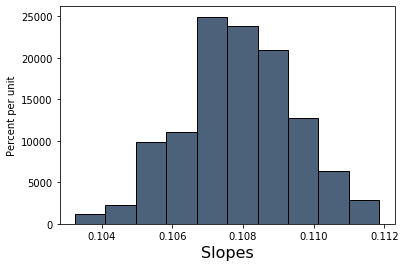

In [23]:
Table().with_columns("Slopes", slopes).hist()    
print('Standard dev. of bootstrapped slopes: ', np.std(slopes))

In [24]:
model = sm.OLS(logwage, sm.add_constant(educ)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.204
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     5600.
Date:                Mon, 13 Apr 2020   Prob (F-statistic):               0.00
Time:                        13:45:46   Log-Likelihood:                -20513.
No. Observations:               21907   AIC:                         4.103e+04
Df Residuals:                   21905   BIC:                         4.105e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4723      0.021     71.483      0.000       1.432       1.513
x1             0.1078      0.001     74.831      0.000       0.105       0.111
==============================================================================
Omnibus:                      989.972   Durbin-Watson:                   1.873
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2802.765
Skew:                           0.201   Prob(JB):                         0.00
Kurtosis:                       4.706   Cond. No.                         70.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
print('SE of beta 1: ', model.bse[1])

SE of beta 1:  0.0014407230448454968


Our bootstrapped approximation standard error of 0.00159 is pretty close to the true standard error of 0.00144. 

In [26]:
# Using our resampled slopes
lower_bound = percentile(2.5, slopes)
upper_bound = percentile(97.5, slopes)
print('95% confidence interval: [{}, {}]'.format(lower_bound, upper_bound))

95% confidence interval: [0.1045603129388414, 0.1109373558983047]


In [27]:
# Using the given standard deviation in sample slopes from statsmodels
lower_bound = model.params[1] - 1.96 * model.bse[1]
upper_bound = model.params[1] + 1.96 * model.bse[1]
print('95% confidence interval: [{}, {}]'.format(lower_bound, upper_bound))

95% confidence interval: [0.10498752208009443, 0.11063515641588878]


In [28]:
model = sm.OLS(logwage, sm.add_constant(educ)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.204
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     5600.
Date:                Mon, 13 Apr 2020   Prob (F-statistic):               0.00
Time:                        13:45:46   Log-Likelihood:                -20513.
No. Observations:               21907   AIC:                         4.103e+04
Df Residuals:                   21905   BIC:                         4.105e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4723      0.021     71.483      0.000       1.432       1.513
x1             0.1078      0.001     74.831      0.000       0.105       0.111
==============================================================================
Omnibus:                      989.972   Durbin-Watson:                   1.873
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2802.765
Skew:                           0.201   Prob(JB):                         0.00
Kurtosis:                       4.706   Cond. No.                         70.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$\hat{\beta}$ is 74 standard deviations away from the null hypothesis mean of 0.

## Regression with a Binary Variable

A binary variable is a variable that takes on the value of 1 if some condition is true, and 0 otherwise.

These are also called dummy variables or indicator variables.

In [29]:
nlsy = Table.read_table('nlsy_cleaned_small.csv')
nlsy.sample(5)

male,AFQT,real_earnings_1999,weeks_worked_1999,log_earn_1999,college,mother_college,father_college
0,74.074,49736.7,52,10.8145,0,0,0
0,95.098,51830.8,52,10.8557,0,0,0
1,34.268,47118.9,52,10.7604,0,0,0
0,69.863,13088.6,33,9.4795,0,0,0
0,20.428,19632.9,52,9.88496,0,0,0


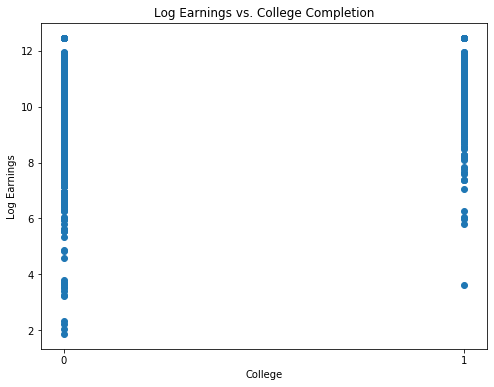

In [30]:
coll = nlsy.column('college')
logearn = nlsy.column('log_earn_1999')
plt.figure(figsize=(8,6))
plt.scatter(coll, logearn)
plt.xlabel('College')
plt.ylabel('Log Earnings')
plt.title('Log Earnings vs. College Completion')
plt.xticks([0,1]);

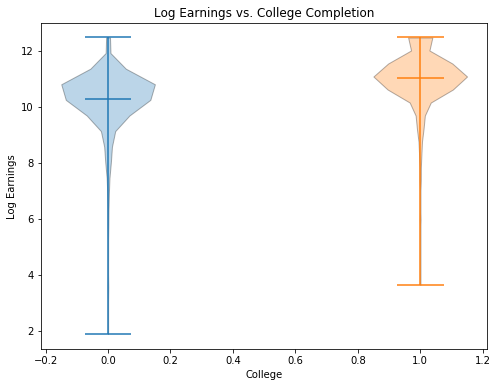

In [31]:
no_college = nlsy.where('college', 0).column("log_earn_1999")
has_college = nlsy.where('college', 1).column("log_earn_1999")
plt.figure(figsize=(8,6))
plt.xlabel('College')
plt.ylabel('Log Earnings')
plt.title('Log Earnings vs. College Completion')
plt.violinplot(no_college, positions = [0], points=20, widths=0.3, showmeans=True, showextrema=True, showmedians=False)
plt.violinplot(has_college, positions = [1], points=20, widths=0.3, showmeans=True, showextrema=True, showmedians=False);

In [32]:
model = sm.OLS(logearn, sm.add_constant(coll)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     494.9
Date:                Mon, 13 Apr 2020   Prob (F-statistic):          5.56e-105
Time:                        13:45:47   Log-Likelihood:                -7547.4
No. Observations:                5413   AIC:                         1.510e+04
Df Residuals:                    5411   BIC:                         1.511e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.2788      0.015    688.615      0.000      10.250      10.308
x1             0.7239      0.033     22.246      0.000       0.660       0.788
==============================================================================
Omnibus:                     2766.797   Durbin-Watson:                   1.880
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            29857.593
Skew:                          -2.201   Prob(JB):                         0.00
Kurtosis:                      13.631   Cond. No.                         2.58
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

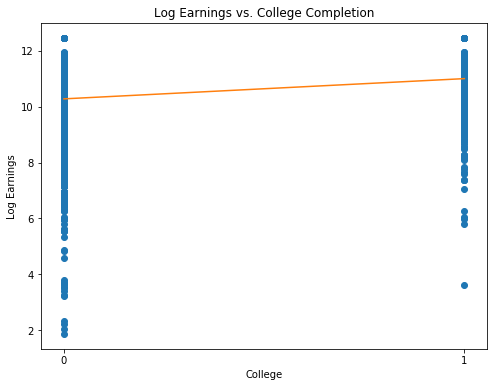

In [33]:
plt.figure(figsize=(8,6))
plt.scatter(coll, logearn)
plt.plot(np.linspace(0, 1), model.params[1] * np.linspace(0, 1) + model.params[0], color='tab:orange')
plt.xlabel('College')
plt.ylabel('Log Earnings')
plt.title('Log Earnings vs. College Completion')
plt.xticks([0,1]);

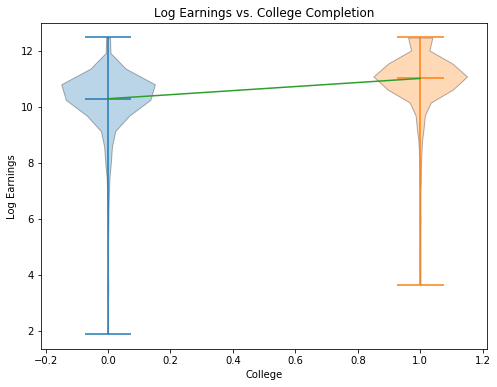

In [34]:
no_college = nlsy.where('college', 0).column("log_earn_1999")
has_college = nlsy.where('college', 1).column("log_earn_1999")
plt.figure(figsize=(8,6))
plt.plot(np.linspace(0, 1), model.params[1] * np.linspace(0, 1) + model.params[0], color='tab:green')
plt.xlabel('College')
plt.ylabel('Log Earnings')
plt.title('Log Earnings vs. College Completion')
plt.violinplot(no_college, positions = [0], points=20, widths=0.3, showmeans=True, showextrema=True, showmedians=False)
plt.violinplot(has_college, positions = [1], points=20, widths=0.3, showmeans=True, showextrema=True, showmedians=False);

When we perform a simple regression onto just a dummy variable: 

* $\hat{\alpha}$ is the mean value of $y$ ($\hat{\mu}_y$) for all observations in the sample where $x = 0$
* $\hat{\beta}$ is the difference between $\hat{\mu}_y$ for observations in the sample where $x = 1$ and observations where $x = 0$.

In [35]:
avg_logearn_coll = np.mean(logearn[coll == 1])
avg_logearn_nocoll = np.mean(logearn[coll == 0])

print('Avg logearn for coll = 1: ', avg_logearn_coll)
print('Avg logearn for coll = 0: ', avg_logearn_nocoll)
print('Difference between the two: ', avg_logearn_coll - avg_logearn_nocoll)

Avg logearn for coll = 1:  11.002722859240283
Avg logearn for coll = 0:  10.278831734712744
Difference between the two:  0.7238911245275386


In [36]:
print('Intercept: ', model.params[0])
print('Slope: ', model.params[1])

Intercept:  10.27883173471275
Slope:  0.723891124527542


## Multivariable Regression and Bias

Our procedure earlier showed that we expect to see roughly a 70% increase in earnings in people who went to college vs. people who did not go to college.

Does this imply that your decision to go to college was worthwhile, and now you can expect to have roughly 70% higher earnings compared to the version of you who did not go to college?

In an ideal experiment, we would want to randomly assign people to either a treatment group that gets sent to college, and a control group that does not.

This experiment is impossible to perform. We cannot randomly assign people to go to college.

What's the issue with comparing the differences in log earnings for people in our sample who happened to go to college, and those who did not?

In our sample, the treatment (went to college) and control (did not go to college) groups are not identical!

People aren't randomly assigned college, they *choose* to go to college.

There are differences between people who chose to go to college and those who did not.

When we perform regression on the variable "college", not only are we capturing the effect of going to college, but we are also capturing the effects of everything else that affects earnings.

Imagine another variable: wealth of your family.

College can be very expensive, so maybe that the wealthier your family is, the more likely you are to go to college.

Also, it's likely that the wealthier your family is, the wealthier you are likely to be in the future.

This implies that the group of people in the sample who went to college will tend to be wealthier than the group that did not.

Also, the group of people who went to college is expected to earn more, not necessarily because they went to college, but simply because they are wealthier.

Because of this, we *over-estimate* the effect of going to college, $\hat{\beta}$.

This is called *omitted variable bias*. Family wealth is an omitted variable in this regression and it's causing our results to be biased.

AFQT is a score on a particular standardized test that all people in the sample took.

Is there omitted variable bias from AFQT?

Almost certainly. It seems fair to believe that people who choose to go to college are on average more academically-capable, and it also seems fair to say that on average we expect more capable people to earn more.

### Multivariable Regression

For outcome variable $y$ and one explanatory variable $x$, we choose $\hat{\alpha}$ and $\hat{\beta}$ that minimize the mean squared error.

But what if we believe that $y$ is actually determined by two variables, $x_1$ and $x_2$? Specifically, what if this is the "true" model:

$$
y = \alpha + \beta_1 x_{1} + \beta_2 x_{2} + \epsilon
$$

and we would like to estimate the following:

$$
\hat{y} = \hat{\alpha} + \hat{\beta}_1 x_{1} + \hat{\beta}_2 x_{2}
$$

In [37]:
def rmse(target, pred):
    return np.sqrt(mean_squared_error(target, pred)) 

def to_minimize(intercept, beta_1, beta_2):
    predictions = intercept + beta_1 * nlsy.column('college') + beta_2 * nlsy.column("AFQT")
    actual = nlsy.column('log_earn_1999')
    return rmse(predictions, actual)

minimize(to_minimize)

array([9.95595982e+00, 4.30179178e-01, 8.37569589e-03])

```python
X = tbl.select(features).values
y = tbl.column(target)
model = sm.OLS(y, sm.add_constant(X))
result = model.fit()
result.summary()
```

In [38]:
y = nlsy.column('log_earn_1999')
X = nlsy.select('college', 'AFQT').values.astype(float)
model = sm.OLS(y, sm.add_constant(X)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.126
Model:                            OLS   Adj. R-squared:                  0.125
Method:                 Least Squares   F-statistic:                     388.5
Date:                Mon, 13 Apr 2020   Prob (F-statistic):          2.12e-158
Time:                        13:45:48   Log-Likelihood:                -7421.0
No. Observations:                5413   AIC:                         1.485e+04
Df Residuals:                    5410   BIC:                         1.487e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.9563      0.025    401.520      0.000       9.908      10.005
x1             0.4301      0.037     11.731      0.000       0.358       0.502
x2             0.0084      0.001     16.083      0.000       0.007       0.009
==============================================================================
Omnibus:                     2898.806   Durbin-Watson:                   1.923
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            34192.355
Skew:                          -2.307   Prob(JB):                         0.00
Kurtosis:                      14.415   Cond. No.                         155.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Here $\hat{\beta}_1$ is 0.43, compared to 0.72 from the earlier "biased" regression.

When we control for a person's ability (i.e. we get rid of that source of bias), we only see that on average going to college is associated with a 43% increase in earnings instead of 72%.

AFQT was probably an omitted variable causing $\hat{\beta}_1$ to be biased.

When interpreting $\hat{\beta}$ coefficients, you should always be mindful of potential sources of bias.

### Visualizing Multivariable Regression

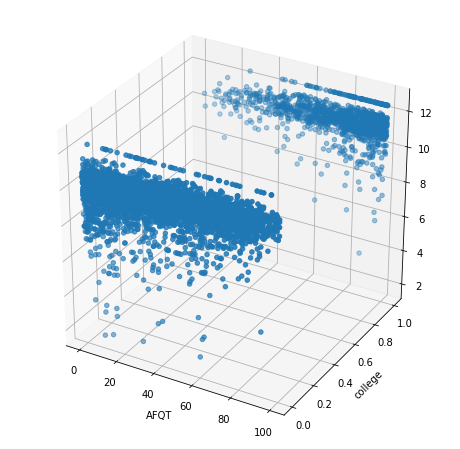

In [39]:
ax = plt.figure(figsize=(8,8)).add_subplot(111, projection='3d')
ax.scatter(nlsy.column("AFQT"), 
           nlsy.column("college"), 
           nlsy.column('log_earn_1999'))
plt.xlabel("AFQT")
plt.ylabel("college");

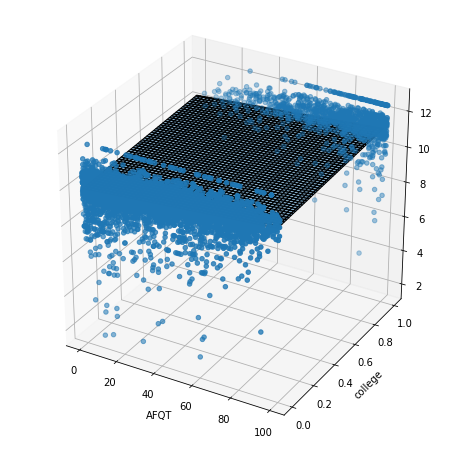

In [40]:
X,Y = np.meshgrid(np.arange(0,100,1), np.arange(0,1,0.01))
Z = 0.0084 * X + 0.4301 * Y + 9.9563
ax = plt.figure(figsize=(8,8)).add_subplot(111, projection='3d')
ax.scatter(nlsy.column("AFQT"), 
           nlsy.column("college"), 
           nlsy.column('log_earn_1999'))
ax.plot_surface(X, Y, Z, alpha=0.5)
plt.xlabel("AFQT")
plt.ylabel("college");

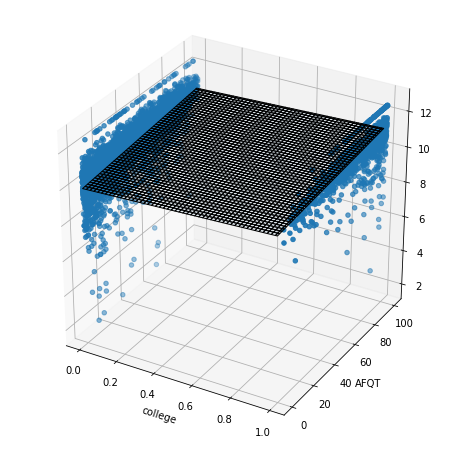

In [41]:
X,Y = np.meshgrid(np.arange(0,1,0.01), np.arange(0,100,1))
Z = 0.4301 * X + 0.0084 * Y + 9.9563
ax = plt.figure(figsize=(8,8)).add_subplot(111, projection='3d')
ax.scatter(nlsy.column("college"), 
           nlsy.column("AFQT"), 
           nlsy.column('log_earn_1999'))
ax.plot_surface(X, Y, Z, alpha=0.1)
plt.ylabel("AFQT")
plt.xlabel("college");

## Colinearity and Dummy Variables

Imagine we have a dataset with a variable for college, a variable for not going to college, and the intercept term.

* College = 1
* Not College = 0
* Intercept term = 1

* Intercept = College + Not College
* Not College = Intercept - College
* College = Intercept - Not College

In general, we have redundancy whenever we have *mutually exclusive* and *exhaustive* dummy variables in combination with an intercept term.
* Mutually exclusive: You cannot be in more than one dummy variable.
* Exhaustive: You must be in at least one dummy variable.

You can see that "college" and "not college" satisfy these conditions.

So why is this redundancy an issue? It becomes ambiguous what the values for $\hat{\alpha}$, $\hat{\beta}_1$, and $\hat{\beta}_2$ should be in:

$$
\text{log earnings} = \hat{\alpha} + \hat{\beta}_1 \text{college} + \hat{\beta}_2 \text{not college}
$$

Consider a case where we expect:
* people who went to college to have log earnings of 10
* those who did not go to college to have log earnings of 8.

What values for $\hat{\beta}$ and $\hat{\alpha}$ make sense?

* $\hat{\beta}_1 = 10$
* $\hat{\beta}_2 = 8$
* $\hat{\alpha} = 0$

make sense. To see why, consider a person with college:

$$
\text{log earnings} = \hat{\alpha} + \hat{\beta}_1 \cdot 1 + \hat{\beta}_2 \cdot 0 \\
\text{log earnings} = \hat{\alpha} + \hat{\beta}_1 \\
\text{log earnings} = 0 + 10 = 10
$$

and a person without college:

$$
\text{log earnings} = \hat{\alpha} + \hat{\beta}_1 \cdot 0 + \hat{\beta}_2 \cdot 1 \\
\text{log earnings} = \hat{\alpha} + \hat{\beta}_2 \\
\text{log earnings} = 0 + 8 = 8
$$

* $\hat{\beta}_1 = 2$
* $\hat{\beta}_2 = 0$
* $\hat{\alpha} = 8$

also make sense. To see why, consider a person with college:

$$
\text{log earnings} = \hat{\alpha} + \hat{\beta}_1 \cdot 1 + \hat{\beta}_2 \cdot 0 \\
\text{log earnings} = \hat{\alpha} + \hat{\beta}_1 \\
\text{log earnings} = 8 + 2 = 10
$$

and a person without college:

$$
\text{log earnings} = \hat{\alpha} + \hat{\beta}_1 \cdot 0 + \hat{\beta}_2 \cdot 1 \\
\text{log earnings} = \hat{\alpha} + \hat{\beta}_2 \\
\text{log earnings} = 8 + 0 = 8
$$

It turns out, there are actually infinitely many solutions for $\hat{\beta}$.

So how do we avoid this problem? We deliberately exclude one of the variables.